# Librerias , Google y Bigquery

In [17]:
import numpy as np  # Importamos la librerias que usaremos en el proyecto, numpy por convencion
import pandas as pd #Pandas para trabaja con DataFrames
from google.cloud import bigquery #Google Cloud bigquey para acceder a la base de datos
import matplotlib.pyplot as plt #MatployLib para los graficos
from datetime import datetime # Libreria para trabajar de forma mas amena las fechas

In [2]:
client = bigquery.Client()  #Creamos un Cliente

In [3]:
from google.colab import auth
auth.authenticate_user()  # Nos autentificamos on google para poder usar los Datos Publicos

In [4]:
dataset_ref = client.dataset("covid19_vaccination_search_insights" , project = "bigquery-public-data") #Buscamos el Dataset de nuestro Interes

In [5]:
dataset_ref

DatasetReference('bigquery-public-data', 'covid19_vaccination_search_insights')

In [6]:
dataset = client.get_dataset(dataset_ref)

In [7]:
tables = list(client.list_tables(dataset))

In [8]:
for table in tables:
  print(table.table_id)

covid19_vaccination_search_insights


In [9]:
tablref = dataset_ref.table("covid19_vaccination_search_insights")
table = client.get_table(tablref)
#Finalmente Agregamos a Tablas para poder visualizar los datos

# Visualizamos Los Datos

In [10]:
 client.list_rows(table, max_results=3000).to_dataframe() #Vemos los primeros 3000 datos

,date,country_region,country_region_code,sub_region_1,sub_region_1_code,sub_region_2,sub_region_2_code,sub_region_3,sub_region_3_code,place_id,sni_covid19_vaccination,sni_vaccination_intent,sni_safety_side_effects
0,2021-07-12,Australia,AU,Western Australia,AU-WA,Shire of Toodyay,None,None,None,ChIJ--guQW4ozSsRbePnYkBlnDU,37.426,NaN,NaN
1,2022-04-18,Australia,AU,Western Australia,AU-WA,Shire of Toodyay,None,None,None,ChIJ--guQW4ozSsRbePnYkBlnDU,23.876,13.754,NaN
2,2022-03-07,Australia,AU,Western Australia,AU-WA,Shire of Toodyay,None,None,None,ChIJ--guQW4ozSsRbePnYkBlnDU,46.850,24.868,NaN
3,2021-07-26,Australia,AU,Western Australia,AU-WA,Shire of Toodyay,None,None,None,ChIJ--guQW4ozSsRbePnYkBlnDU,47.427,18.745,NaN
4,2022-01-31,Australia,AU,Western Australia,AU-WA,Shire of Toodyay,None,None,None,ChIJ--guQW4ozSsRbePnYkBlnDU,111.568,61.227,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2022-05-30,Australia,AU,New South Wales,AU-NSW,Port Stephens Council,None,None,None,ChIJ0Tt7ebB6c2sREnSb-VieKEg,11.305,6.183,1.139
2996,2023-07-10,Australia,AU,New South Wales,AU-NSW,Port Stephens Council,None,None,None,ChIJ0Tt7ebB6c2sREnSb-VieKEg,3.512,1.602,NaN
2997,2021-03-22,Australia,AU,New South Wales,AU-NSW,Port Stephens Council,None,None,None,ChIJ0Tt7ebB6c2sREnSb-VieKEg,16.556,9.805,1.995
2998,2021-06-14,Australia,AU,New South Wales,AU-NSW,Port Stephens Council,None,None,None,ChIJ0Tt7ebB6c2sREnSb-VieKEg,34.356,13.572,5.932


In [11]:
 client.list_rows(table, max_results=3000).to_dataframe().iloc[0:61] #Vemos los datos entre las filas 0 y 61

,date,country_region,country_region_code,sub_region_1,sub_region_1_code,sub_region_2,sub_region_2_code,sub_region_3,sub_region_3_code,place_id,sni_covid19_vaccination,sni_vaccination_intent,sni_safety_side_effects
0,2021-07-12,Australia,AU,Western Australia,AU-WA,Shire of Toodyay,None,None,None,ChIJ--guQW4ozSsRbePnYkBlnDU,37.426,NaN,NaN
1,2022-04-18,Australia,AU,Western Australia,AU-WA,Shire of Toodyay,None,None,None,ChIJ--guQW4ozSsRbePnYkBlnDU,23.876,13.754,NaN
2,2022-03-07,Australia,AU,Western Australia,AU-WA,Shire of Toodyay,None,None,None,ChIJ--guQW4ozSsRbePnYkBlnDU,46.850,24.868,NaN
3,2021-07-26,Australia,AU,Western Australia,AU-WA,Shire of Toodyay,None,None,None,ChIJ--guQW4ozSsRbePnYkBlnDU,47.427,18.745,NaN
4,2022-01-31,Australia,AU,Western Australia,AU-WA,Shire of Toodyay,None,None,None,ChIJ--guQW4ozSsRbePnYkBlnDU,111.568,61.227,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-11-22,Australia,AU,Western Australia,AU-WA,Shire of Toodyay,None,None,None,ChIJ--guQW4ozSsRbePnYkBlnDU,73.599,34.888,NaN
57,2022-01-03,Australia,AU,Western Australia,AU-WA,Shire of Toodyay,None,None,None,ChIJ--guQW4ozSsRbePnYkBlnDU,165.791,94.637,NaN
58,2021-09-27,Australia,AU,Western Australia,AU-WA,Shire of Toodyay,None,None,None,ChIJ--guQW4ozSsRbePnYkBlnDU,68.984,26.404,NaN
59,2021-11-01,Australia,AU,Western Australia,AU-WA,Shire of Toodyay,None,None,None,ChIJ--guQW4ozSsRbePnYkBlnDU,70.422,36.902,NaN


In [13]:
 client.list_rows(table, max_results=3000).to_dataframe().iloc[2900:3000]

,date,country_region,country_region_code,sub_region_1,sub_region_1_code,sub_region_2,sub_region_2_code,sub_region_3,sub_region_3_code,place_id,sni_covid19_vaccination,sni_vaccination_intent,sni_safety_side_effects
2900,2024-01-01,Australia,AU,South Australia,AU-SA,City of Charles Sturt,None,None,None,ChIJ0Ts3VsTFsGoRL8KyGmM4LaM,3.971,2.097,NaN
2901,2022-02-14,Australia,AU,South Australia,AU-SA,City of Charles Sturt,None,None,None,ChIJ0Ts3VsTFsGoRL8KyGmM4LaM,47.166,28.855,4.266
2902,2022-06-13,Australia,AU,South Australia,AU-SA,City of Charles Sturt,None,None,None,ChIJ0Ts3VsTFsGoRL8KyGmM4LaM,16.927,9.669,1.200
2903,2022-10-10,Australia,AU,South Australia,AU-SA,City of Charles Sturt,None,None,None,ChIJ0Ts3VsTFsGoRL8KyGmM4LaM,12.730,6.679,0.856
2904,2021-03-01,Australia,AU,South Australia,AU-SA,City of Charles Sturt,None,None,None,ChIJ0Ts3VsTFsGoRL8KyGmM4LaM,17.754,5.308,2.366
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2022-05-30,Australia,AU,New South Wales,AU-NSW,Port Stephens Council,None,None,None,ChIJ0Tt7ebB6c2sREnSb-VieKEg,11.305,6.183,1.139
2996,2023-07-10,Australia,AU,New South Wales,AU-NSW,Port Stephens Council,None,None,None,ChIJ0Tt7ebB6c2sREnSb-VieKEg,3.512,1.602,NaN
2997,2021-03-22,Australia,AU,New South Wales,AU-NSW,Port Stephens Council,None,None,None,ChIJ0Tt7ebB6c2sREnSb-VieKEg,16.556,9.805,1.995
2998,2021-06-14,Australia,AU,New South Wales,AU-NSW,Port Stephens Council,None,None,None,ChIJ0Tt7ebB6c2sREnSb-VieKEg,34.356,13.572,5.932


# ¿ Que Graficar ?

Intentare para poder trabajar de mejor manera, guardar en listas , ciertos datos de la tablas *creadas*

In [16]:
rows = client.list_rows(table)
 #Realize un algoritmo de busqueda a traves de las columnas, buscando la existencia de una palabra clave para asi guardar los datos de filas en donde si la
 #Columna 3 posee el nombre de la ciudad que buscamos, tome los datos de la otras otra columna en la fila correspondiente

Results = []
contador = 0
fechas_un = set()

for row in rows:
    if contador >= 70:
        break
    if row[3] == "England":
        fecha = row[0]
        Vac = row[10]
        if fecha is not None and Vac is not None and fecha not in fechas_un:
            Results.append((fecha, Vac))
            fechas_un.add(fecha)
            contador += 1


results_or = sorted(Results, key=lambda x: x[0])
fechas = [x[0] for x in results_or]
Vacunas = [x[1] for x in results_or]

print("Fechas:", fechas)
print("Vacunaciones:", Vacunas)
#En este caso buscamos, la cantidad de vacunas con su respectiva fecha


Fechas: [datetime.date(2021, 1, 4), datetime.date(2021, 1, 11), datetime.date(2021, 2, 8), datetime.date(2021, 3, 8), datetime.date(2021, 3, 15), datetime.date(2021, 3, 22), datetime.date(2021, 4, 5), datetime.date(2021, 4, 12), datetime.date(2021, 4, 19), datetime.date(2021, 4, 26), datetime.date(2021, 5, 3), datetime.date(2021, 5, 10), datetime.date(2021, 5, 24), datetime.date(2021, 5, 31), datetime.date(2021, 6, 14), datetime.date(2021, 6, 21), datetime.date(2021, 8, 2), datetime.date(2021, 8, 9), datetime.date(2021, 8, 16), datetime.date(2021, 9, 6), datetime.date(2021, 9, 13), datetime.date(2021, 9, 20), datetime.date(2021, 10, 18), datetime.date(2021, 11, 1), datetime.date(2021, 11, 15), datetime.date(2021, 11, 29), datetime.date(2021, 12, 6), datetime.date(2021, 12, 20), datetime.date(2021, 12, 27), datetime.date(2022, 1, 3), datetime.date(2022, 1, 17), datetime.date(2022, 1, 31), datetime.date(2022, 2, 7), datetime.date(2022, 2, 21), datetime.date(2022, 3, 14), datetime.date(20

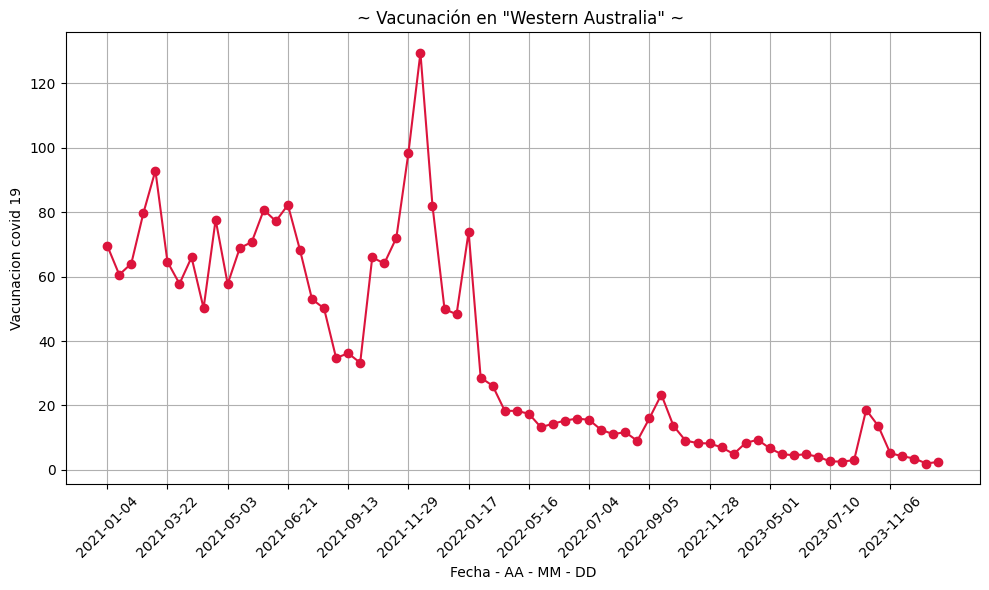

In [18]:
fechas_str = [fecha.strftime("%Y-%m-%d") for fecha in fechas]


plt.figure(figsize=(10, 6))
plt.plot(fechas_str, Vacunas, marker='o', linestyle='-' , color = 'crimson')
plt.title('~ Vacunación en "Western Australia" ~ ')
plt.xlabel('Fecha - AA - MM - DD')
plt.ylabel('Vacunacion covid 19')
plt.xticks(fechas_str[::5], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

 Realizamos un grafico, con los datos de fecha vs vacunacion, pero nos damos cuenta que existe la posibilidad de comparar la tasa de vacunacion con la aparicion de efectos secundarios y comparalo con 3 regiones de un mismo pais para estimar, primero la relacion entre efecto secundarios y vacunacion ademas de evaluar una ventana temporal en la tasa de vacunacion y la aparicion de efectos secundarios para luego compararlo con las 3 regiones elegidas.